In [ ]:
from modelhub import pretrained_sov_stg_s, ImageProcessor, ResultParser, draw_boxes

## Load sov-stg-s

In [ ]:
checkpoint_path = 'params/sov-stg-s.pth'
model, PostPeocessor = pretrained_sov_stg_s(checkpoint_path, True)
model.cuda()
model.eval()

## Load an example image

In [199]:
iamge_path = 'data/hico_det/images/test2015/HICO_test2015_00007397.jpg'
img, img_size, orig_img = ImageProcessor(iamge_path, device='cuda')

# Inference

In [200]:
output = model([img])
results = PostPeocessor(output, img_size)
out = ResultParser(results[0], thresholds=0.1)

## display result

No interaction human-object pairs should not be displayed, so we remove them.

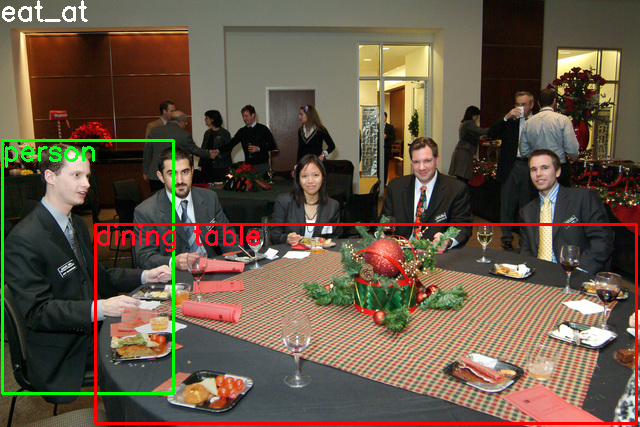

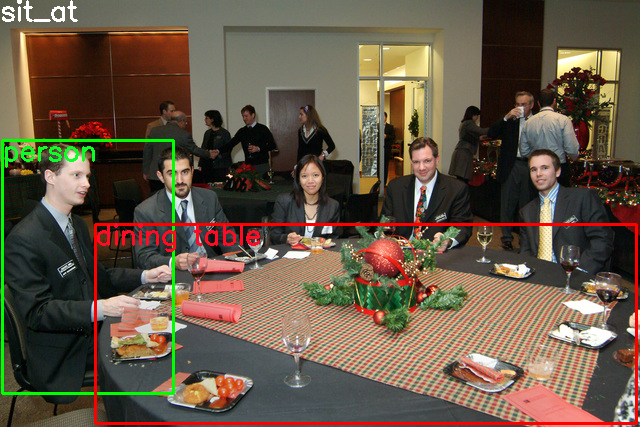

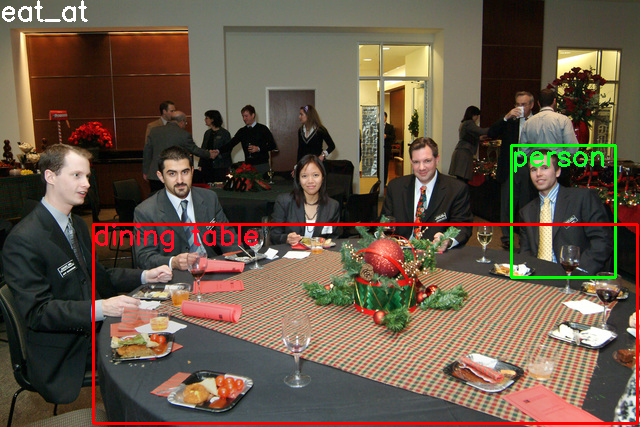

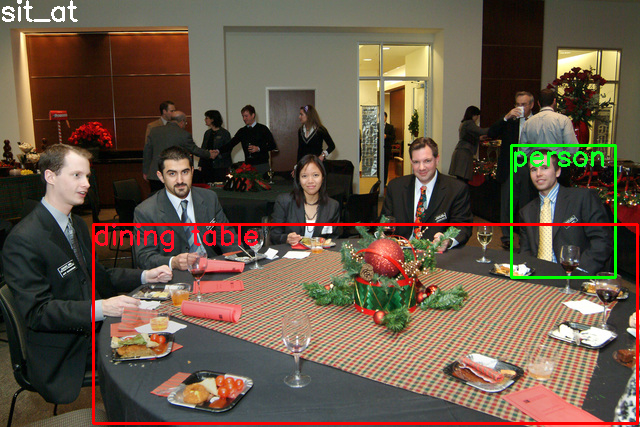

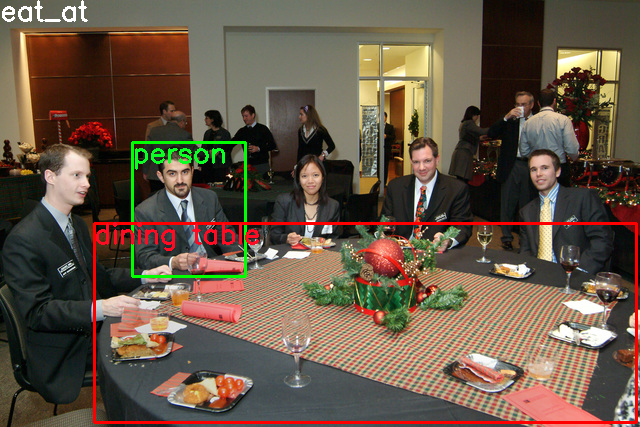

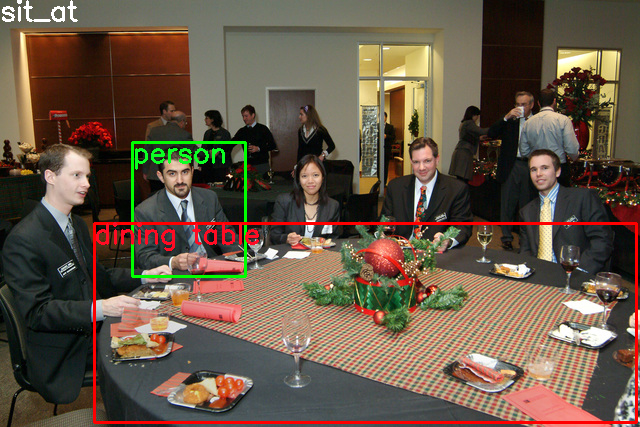

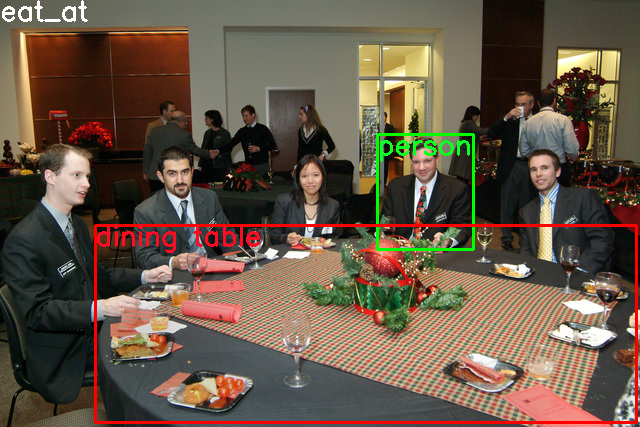

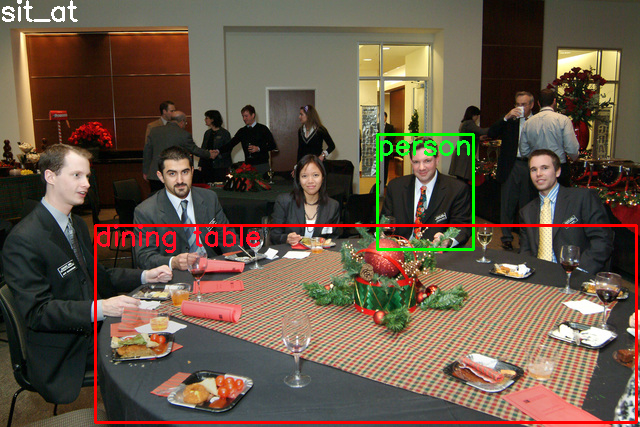

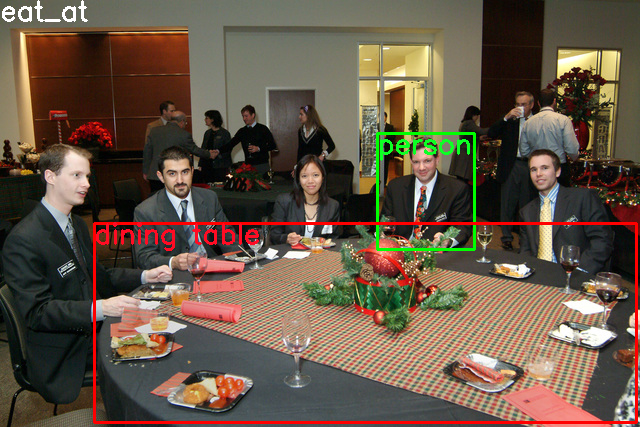

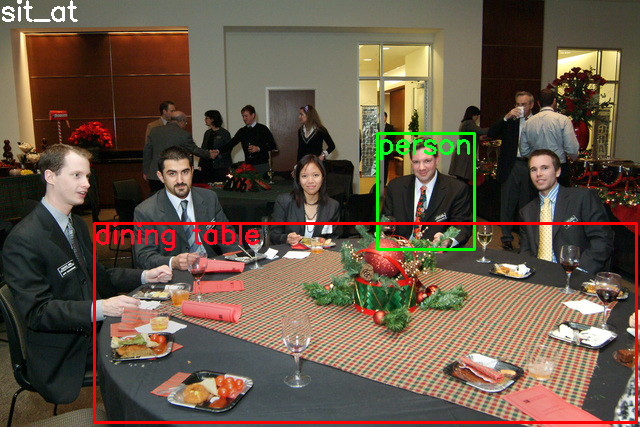

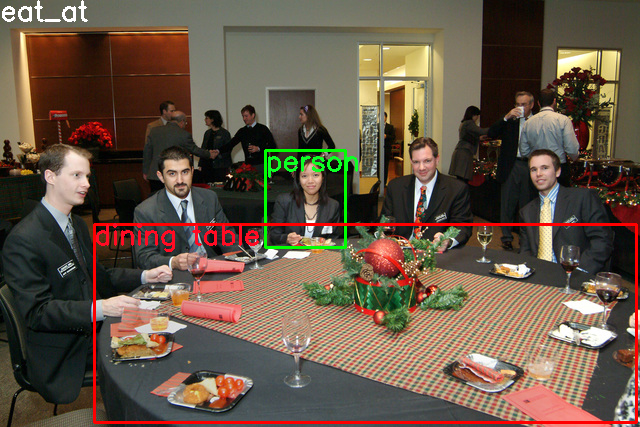

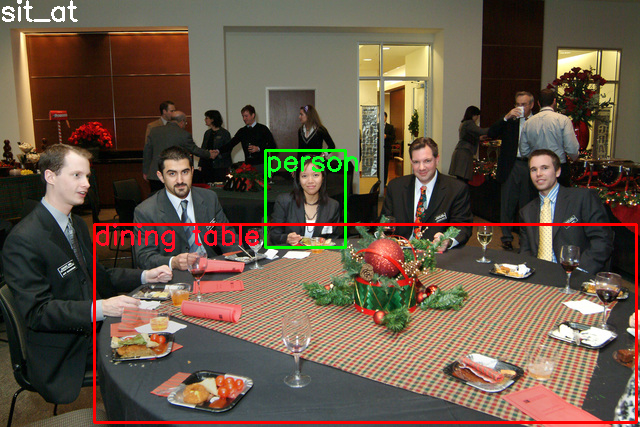

In [201]:
from IPython.display import display
result_images= draw_boxes(orig_img, out)
for _img in result_images:
    display(_img)

### save result images (optional)

In [202]:
for idx, i in enumerate(result_images):
    i.save(f"output_image_{idx}.jpg")